In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from wordcloud import WordCloud
import plotly.express as px
import joblib
import matplotlib.patches as mpatches
import plotly.graph_objects as go
import calendar
import streamlit as st

In [109]:
df1=pd.read_csv("/Users/karthickkumar/Downloads/ResaleFlatPricesBasedonApprovalDate19901999.csv")

In [110]:
df2=pd.read_csv("/Users/karthickkumar/Downloads/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

In [111]:
df3=pd.read_csv("/Users/karthickkumar/Downloads/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

In [112]:
df4=pd.read_csv("/Users/karthickkumar/Downloads/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [113]:
df5=pd.read_csv("/Users/karthickkumar/Downloads/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [114]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

In [115]:
df5.remaining_lease

0         61
1         60
2         62
3         62
4         62
          ..
172701    63
172702    63
172703    62
172704    62
172705    62
Name: remaining_lease, Length: 172706, dtype: int64

Merging all Datasets Together

In [116]:
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True ) # with a new index created ignoring the existing indices.

In [117]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [118]:
df['street_name'].nunique()

584

In [119]:
df['remaining_lease'].unique()

array([nan, 70., 65., 64., 63., 62., 69., 60., 61., 86., 77., 80., 90.,
       87., 66., 58., 94., 71., 68., 84., 73., 79., 76., 72., 82., 74.,
       67., 88., 81., 89., 53., 54., 55., 57., 93., 83., 85., 92., 91.,
       59., 95., 52., 51., 56., 75., 96., 78., 50., 97., 49., 48., 47.,
       46., 45., 44., 43., 42., 41.])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918909 entries, 0 to 918908
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                918909 non-null  object 
 1   town                 918909 non-null  object 
 2   flat_type            918909 non-null  object 
 3   block                918909 non-null  object 
 4   street_name          918909 non-null  object 
 5   storey_range         918909 non-null  object 
 6   floor_area_sqm       918909 non-null  float64
 7   flat_model           918909 non-null  object 
 8   lease_commence_date  918909 non-null  int64  
 9   resale_price         918909 non-null  float64
 10  remaining_lease      209859 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 77.1+ MB


Feature split month and year


In [121]:
df[['year', 'month']] = df['month'].str.split("-",expand=True)
df['year']=pd.to_numeric(df['year'])
df['month']=pd.to_numeric(df['month'])  

In [122]:
df.year

0         1990
1         1990
2         1990
3         1990
4         1990
          ... 
918904    2024
918905    2024
918906    2024
918907    2024
918908    2024
Name: year, Length: 918909, dtype: int64

In [123]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
dtype: int64

The first 3 datasets did not have the column 'remaining lease' and thus when we merged all 5 datasets together we have Nan values on those rows. We use the below formula to obtain the values for those Nan values. 

In [124]:
df.shape

(918909, 12)

In [125]:
# Calculate remaining lease for rows with NaN values
df['remaining_lease'].fillna(99 - (df['year'] - df['lease_commence_date']), inplace=True)

/var/folders/sh/7fvng0wn2tq_p4vz797g2r2w0000gn/T/ipykernel_55877/2701338695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['remaining_lease'].fillna(99 - (df['year'] - df['lease_commence_date']), inplace=True)


In [126]:
# Create a boolean mask to identify rows containing any of the specified values
mask = df['remaining_lease']>99




In [127]:
# Use the boolean mask to drop rows
mask1 = df['storey_range'].isin(mask)

In [128]:
# Drop the rows based on the boolean mask
df.drop(df[mask].index, inplace=True)

In [129]:
# Adding a new column 'current_remaining_lease'
df['current_remaining_lease'] = df['remaining_lease'] - (2024 - df['year'])

In [130]:
# Changing the case to uppercase for consistency
df['flat_model']=df['flat_model'].str.upper()

In [131]:
df['flat_type']=df['flat_type'].str.lower()

In [132]:
df['flat_type'].unique()

array(['1 room', '3 room', '4 room', '5 room', '2 room', 'executive',
       'multi generation', 'multi-generation'], dtype=object)

In [133]:
df['flat_type']=df['flat_type'].replace("multi-generation","multi generation")

In [134]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,current_remaining_lease
0,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,52.0
1,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,52.0
2,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,52.0
3,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,52.0
4,1,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,51.0


In [135]:
df['flat_type'].unique()

array(['1 room', '3 room', '4 room', '5 room', '2 room', 'executive',
       'multi generation'], dtype=object)

In [136]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'TYPE S1', 'TYPE S2', 'DBSS', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [137]:
df.isnull().sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
current_remaining_lease    0
dtype: int64

In [138]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [139]:
# Drop rows where the 'storey_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

In [140]:
df.storey_range

0         10 TO 12
1         04 TO 06
2         10 TO 12
3         07 TO 09
4         04 TO 06
            ...   
918904    04 TO 06
918905    04 TO 06
918906    10 TO 12
918907    07 TO 09
918908    04 TO 06
Name: storey_range, Length: 918858, dtype: object

In [141]:
# Create a boolean mask to identify rows with values to drop in the 'storey_range' column
mask = df['storey_range'].isin(values_to_drop)



In [142]:
# Drop the rows based on the boolean mask
df.drop(df[mask].index, inplace=True)

In [143]:
df.storey_range

0         10 TO 12
1         04 TO 06
2         10 TO 12
3         07 TO 09
4         04 TO 06
            ...   
918904    04 TO 06
918905    04 TO 06
918906    10 TO 12
918907    07 TO 09
918908    04 TO 06
Name: storey_range, Length: 912020, dtype: object

In [144]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51'], dtype=object)

Encoding

In [145]:
df.columns


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'current_remaining_lease'],
      dtype='object')

In [146]:

import pandas as pd

# Assuming df is your DataFrame with 'street_name' and 'resale_price' columns

# Step 1: Calculate the mean resale_price for each street_name
mean_resale_price_per_street = df.groupby('street_name')['resale_price'].mean().reset_index()

# Step 2: Sort the street names based on their mean resale_price
mean_resale_price_per_street = mean_resale_price_per_street.sort_values(by='resale_price')

# Step 3: Assign numerical labels based on mean rank
mean_ranks = range(1, len(mean_resale_price_per_street) + 1)
mean_resale_price_per_street['mean_rank'] = mean_ranks

# Step 4: Apply label encoding based on mean rank
street_name_encoding_map = dict(zip(mean_resale_price_per_street['street_name'], mean_resale_price_per_street['mean_rank']))
df['street_name_encoded'] = df['street_name'].map(street_name_encoding_map)

# Display the DataFrame with encoded street_name
print(df[['street_name', 'street_name_encoded']])

             street_name  street_name_encoded
0       ANG MO KIO AVE 1                  115
1       ANG MO KIO AVE 1                  115
2       ANG MO KIO AVE 1                  115
3       ANG MO KIO AVE 1                  115
4       ANG MO KIO AVE 1                  115
...                  ...                  ...
918904       YISHUN CTRL                  205
918905    YISHUN RING RD                  144
918906      YISHUN ST 61                  196
918907      YISHUN ST 81                  238
918908      YISHUN AVE 4                  296

[912020 rows x 2 columns]


In [147]:
series_dict = df[['street_name', 'street_name_encoded']].to_dict('series') 


In [148]:

import pandas as pd

# Assuming df is your DataFrame with 'town' and 'resale_price' columns

# Step 1: Calculate the mean resale_price for each town
mean_resale_price_per_town = df.groupby('town')['resale_price'].mean().reset_index()

# Step 2: Sort the town names based on their mean resale_price
mean_resale_price_per_town = mean_resale_price_per_town.sort_values(by='resale_price')

# Step 3: Assign numerical labels based on mean rank
mean_ranks = range(1, len(mean_resale_price_per_town) + 1)
mean_resale_price_per_town['mean_rank'] = mean_ranks

# Step 4: Apply label encoding based on mean rank
town_name_encoding_map = dict(zip(mean_resale_price_per_town['town'], mean_resale_price_per_town['mean_rank']))
df['town_name_encoded'] = df['town'].map(town_name_encoding_map)

# Display the DataFrame with encoded town_name
print(df[['town', 'town_name_encoded']])

              town  town_name_encoded
0       ANG MO KIO                  2
1       ANG MO KIO                  2
2       ANG MO KIO                  2
3       ANG MO KIO                  2
4       ANG MO KIO                  2
...            ...                ...
918904      YISHUN                  3
918905      YISHUN                  3
918906      YISHUN                  3
918907      YISHUN                  3
918908      YISHUN                  3

[912020 rows x 2 columns]


In [149]:
pd.DataFrame(df[['town', 'town_name_encoded']])

,town,town_name_encoded
0,ANG MO KIO,2
1,ANG MO KIO,2
2,ANG MO KIO,2
3,ANG MO KIO,2
4,ANG MO KIO,2
...,...,...
918904,YISHUN,3
918905,YISHUN,3
918906,YISHUN,3
918907,YISHUN,3


In [150]:
a={}

for j,i in pd.DataFrame(df[['town', 'town_name_encoded']]).iterrows():
    a[i["town"]]=i["town_name_encoded"]
   # print(i[1])
a  


{'ANG MO KIO': 2,
 'BEDOK': 5,
 'BISHAN': 24,
 'BUKIT BATOK': 6,
 'BUKIT MERAH': 21,
 'BUKIT TIMAH': 26,
 'CENTRAL AREA': 19,
 'CHOA CHU KANG': 20,
 'CLEMENTI': 8,
 'GEYLANG': 4,
 'HOUGANG': 13,
 'JURONG EAST': 7,
 'JURONG WEST': 9,
 'KALLANG/WHAMPOA': 14,
 'MARINE PARADE': 18,
 'QUEENSTOWN': 10,
 'SENGKANG': 25,
 'SERANGOON': 15,
 'TAMPINES': 17,
 'TOA PAYOH': 11,
 'WOODLANDS': 12,
 'YISHUN': 3,
 'LIM CHU KANG': 1,
 'SEMBAWANG': 22,
 'BUKIT PANJANG': 16,
 'PASIR RIS': 23,
 'PUNGGOL': 27}

In [151]:
import json
 
    
# Convert and write JSON object to file
with open("sample.json", "w") as outfile: 
    json.dump(a, outfile)

In [152]:
import json 
   
# Opening JSON file 
f = open('sample.json','r') 
   
# returns JSON object as  
# a dictionary 
data = json.load(f) 
data

{'ANG MO KIO': 2,
 'BEDOK': 5,
 'BISHAN': 24,
 'BUKIT BATOK': 6,
 'BUKIT MERAH': 21,
 'BUKIT TIMAH': 26,
 'CENTRAL AREA': 19,
 'CHOA CHU KANG': 20,
 'CLEMENTI': 8,
 'GEYLANG': 4,
 'HOUGANG': 13,
 'JURONG EAST': 7,
 'JURONG WEST': 9,
 'KALLANG/WHAMPOA': 14,
 'MARINE PARADE': 18,
 'QUEENSTOWN': 10,
 'SENGKANG': 25,
 'SERANGOON': 15,
 'TAMPINES': 17,
 'TOA PAYOH': 11,
 'WOODLANDS': 12,
 'YISHUN': 3,
 'LIM CHU KANG': 1,
 'SEMBAWANG': 22,
 'BUKIT PANJANG': 16,
 'PASIR RIS': 23,
 'PUNGGOL': 27}

In [153]:
data["ANG MO KIO"]

2

In [154]:
series_dict1 = df[['town', 'town_name_encoded']].to_dict('series') 


In [155]:
# Convert the dictionary to a DataFrame
df_to_save1 = pd.DataFrame(series_dict1)

# Save the DataFrame to a JSON file
df_to_save1.to_json('data1.json', orient='records')

In [156]:

import pandas as pd

# Assuming df is your DataFrame with 'flat_type' and 'resale_price' columns

# Step 1: Calculate the mean resale_price for each flat_type
mean_resale_price_per_flat_type = df.groupby('flat_type')['resale_price'].mean().reset_index()

# Step 2: Sort the flat_type names based on their mean resale_price
mean_resale_price_per_flat_type = mean_resale_price_per_flat_type.sort_values(by='resale_price')

# Step 3: Assign numerical labels based on mean rank
mean_ranks = range(1, len(mean_resale_price_per_flat_type) + 1)
mean_resale_price_per_flat_type['mean_rank'] = mean_ranks

# Step 4: Apply label encoding based on mean rank
flat_type_name_encoding_map = dict(zip(mean_resale_price_per_flat_type['flat_type'], mean_resale_price_per_flat_type['mean_rank']))
df['flat_type_name_encoded'] = df['flat_type'].map(flat_type_name_encoding_map)

# Display the DataFrame with encoded flat_type_name
print(df[['flat_type', 'flat_type_name_encoded']])

               flat_type  flat_type_name_encoded
0                 1 room                       1
1                 1 room                       1
2                 1 room                       1
3                 1 room                       1
4                 3 room                       3
...                  ...                     ...
918904         executive                       6
918905         executive                       6
918906         executive                       6
918907         executive                       6
918908  multi generation                       7

[912020 rows x 2 columns]


In [157]:
series_dict2 = df[['flat_type', 'flat_type_name_encoded']].to_dict('series') 


In [158]:
# Convert the dictionary to a DataFrame
df_to_save2 = pd.DataFrame(series_dict2)

# Save the DataFrame to a JSON file
df_to_save2.to_json('data2.json', orient='records')

In [159]:
c={}

for j,i in pd.DataFrame(df[['flat_type','flat_type_name_encoded']]).iterrows():
    c[i["flat_type"]]=i["flat_type_name_encoded"]
   # print(i[1])

c

{'1 room': 1,
 '3 room': 3,
 '4 room': 4,
 '5 room': 5,
 '2 room': 2,
 'executive': 6,
 'multi generation': 7}

In [160]:
import json
 
    
# Convert and write JSON object to file
with open("sample2.json", "w") as outfile: 
    json.dump(c, outfile)

In [161]:
import json 
   
# Opening JSON file 
f2 = open('sample2.json','r') 
   
# returns JSON object as  
# a dictionary 
data2 = json.load(f2) 
data2

{'1 room': 1,
 '3 room': 3,
 '4 room': 4,
 '5 room': 5,
 '2 room': 2,
 'executive': 6,
 'multi generation': 7}

In [162]:

import pandas as pd

# Assuming df is your DataFrame with 'flat_model' and 'resale_price' columns

# Step 1: Calculate the mean resale_price for each flat_model
mean_resale_price_per_flat_model = df.groupby('flat_model')['resale_price'].mean().reset_index()

# Step 2: Sort the flat_model names based on their mean resale_price
mean_resale_price_per_flat_model = mean_resale_price_per_flat_model.sort_values(by='resale_price')

# Step 3: Assign numerical labels based on mean rank
mean_ranks = range(1, len(mean_resale_price_per_flat_model) + 1)
mean_resale_price_per_flat_model['mean_rank'] = mean_ranks

# Step 4: Apply label encoding based on mean rank
flat_model_name_encoding_map = dict(zip(mean_resale_price_per_flat_model['flat_model'], mean_resale_price_per_flat_model['mean_rank']))
df['flat_model_name_encoded'] = df['flat_model'].map(flat_model_name_encoding_map)

# Display the DataFrame with encoded flat_model_name
print(df[['flat_model', 'flat_model_name_encoded']])

              flat_model  flat_model_name_encoded
0               IMPROVED                        6
1               IMPROVED                        6
2               IMPROVED                        6
3               IMPROVED                        6
4         NEW GENERATION                        1
...                  ...                      ...
918904        MAISONETTE                       12
918905         APARTMENT                       13
918906         APARTMENT                       13
918907        MAISONETTE                       12
918908  MULTI GENERATION                       14

[912020 rows x 2 columns]


In [163]:
series_dict3 = df[['flat_model', 'flat_model_name_encoded']].to_dict('series') 


In [164]:
# Convert the dictionary to a DataFrame
df_to_save3 = pd.DataFrame(series_dict3)

# Save the DataFrame to a JSON file
df_to_save3.to_json('data3.json', orient='records')

In [165]:
d={}

for j,i in pd.DataFrame(df[['flat_model', 'flat_model_name_encoded']]).iterrows():
    d[i['flat_model']]=i['flat_model_name_encoded']
   # print(i[1])
d

{'IMPROVED': 6,
 'NEW GENERATION': 1,
 'MODEL A': 7,
 'STANDARD': 3,
 'SIMPLIFIED': 2,
 'MODEL A-MAISONETTE': 10,
 'APARTMENT': 13,
 'MAISONETTE': 12,
 'TERRACE': 15,
 '2-ROOM': 4,
 'IMPROVED-MAISONETTE': 9,
 'MULTI GENERATION': 14,
 'PREMIUM APARTMENT': 8,
 'ADJOINED FLAT': 11,
 'PREMIUM MAISONETTE': 16,
 'MODEL A2': 5,
 'TYPE S1': 20,
 'TYPE S2': 21,
 'DBSS': 18,
 'PREMIUM APARTMENT LOFT': 19,
 '3GEN': 17}

In [166]:
import json
 
    
# Convert and write JSON object to file
with open("sample3.json", "w") as outfile: 
    json.dump(d, outfile)

In [167]:
import json 
   
# Opening JSON file 
f3 = open('sample3.json','r') 
   
# returns JSON object as  
# a dictionary 
data3 = json.load(f3) 
data3

{'IMPROVED': 6,
 'NEW GENERATION': 1,
 'MODEL A': 7,
 'STANDARD': 3,
 'SIMPLIFIED': 2,
 'MODEL A-MAISONETTE': 10,
 'APARTMENT': 13,
 'MAISONETTE': 12,
 'TERRACE': 15,
 '2-ROOM': 4,
 'IMPROVED-MAISONETTE': 9,
 'MULTI GENERATION': 14,
 'PREMIUM APARTMENT': 8,
 'ADJOINED FLAT': 11,
 'PREMIUM MAISONETTE': 16,
 'MODEL A2': 5,
 'TYPE S1': 20,
 'TYPE S2': 21,
 'DBSS': 18,
 'PREMIUM APARTMENT LOFT': 19,
 '3GEN': 17}

In [168]:

import pandas as pd

# Assuming df is your DataFrame with 'block' and 'resale_price' columns

# Step 1: Calculate the mean resale_price for each block
mean_resale_price_per_block = df.groupby('block')['resale_price'].mean().reset_index()

# Step 2: Sort the block names based on their mean resale_price
mean_resale_price_per_block = mean_resale_price_per_block.sort_values(by='resale_price')

# Step 3: Assign numerical labels based on mean rank
mean_ranks = range(1, len(mean_resale_price_per_block) + 1)
mean_resale_price_per_block['mean_rank'] = mean_ranks

# Step 4: Apply label encoding based on mean rank
block_name_encoding_map = dict(zip(mean_resale_price_per_block['block'], mean_resale_price_per_block['mean_rank']))
df['block_name_encoded'] = df['block'].map(block_name_encoding_map)

# Display the DataFrame with encoded block_name
print(df[['block', 'block_name_encoded']])

       block  block_name_encoded
0        309                  39
1        309                  39
2        309                  39
3        309                  39
4        216                 465
...      ...                 ...
918904   325                 927
918905   387                1766
918906   606                 871
918907   824                 488
918908   666                1405

[912020 rows x 2 columns]


In [169]:
series_dict4 = df[['block', 'block_name_encoded']].to_dict('series') 


In [170]:
# Convert the dictionary to a DataFrame
df_to_save4 = pd.DataFrame(series_dict4)

# Save the DataFrame to a JSON file
df_to_save4.to_json('data4.json', orient='records')

In [171]:
e={}

for j,i in pd.DataFrame(df[['block', 'block_name_encoded']]).iterrows():
    e[i["block"]]=i["block_name_encoded"]
   # print(i[1])
e

{'309': 39,
 '216': 465,
 '211': 16,
 '202': 131,
 '235': 306,
 '232': 341,
 '308': 114,
 '220': 206,
 '219': 86,
 '247': 91,
 '320': 191,
 '252': 132,
 '223': 514,
 '230': 394,
 '329': 225,
 '313': 123,
 '117': 330,
 '110': 226,
 '343': 151,
 '345': 223,
 '346': 199,
 '121': 579,
 '129': 300,
 '130': 502,
 '128': 471,
 '127': 150,
 '126': 281,
 '403': 111,
 '404': 436,
 '405': 872,
 '417': 438,
 '418': 533,
 '419': 282,
 '441': 416,
 '442': 346,
 '443': 396,
 '444': 276,
 '450': 498,
 '435': 75,
 '433': 99,
 '434': 212,
 '424': 492,
 '425': 420,
 '466': 531,
 '471': 715,
 '474': 290,
 '570': 128,
 '586': 744,
 '455': 1130,
 '465': 379,
 '463': 105,
 '564': 429,
 '560': 456,
 '558': 776,
 '559': 600,
 '538': 612,
 '534': 34,
 '601': 580,
 '603': 603,
 '604': 859,
 '608': 228,
 '611': 550,
 '505': 568,
 '503': 309,
 '610': 241,
 '607': 448,
 '524': 314,
 '513': 139,
 '643': 897,
 '542': 728,
 '548': 748,
 '550': 205,
 '639': 666,
 '637': 585,
 '330': 452,
 '333': 556,
 '156': 1071,
 '15

In [172]:
import json
 
    
# Convert and write JSON object to file
with open("sample4.json", "w") as outfile: 
    json.dump(e, outfile)

In [173]:
import json 
   
# Opening JSON file 
f4 = open('sample4.json','r') 
   
# returns JSON object as  
# a dictionary 
data4 = json.load(f4) 
data4

{'309': 39,
 '216': 465,
 '211': 16,
 '202': 131,
 '235': 306,
 '232': 341,
 '308': 114,
 '220': 206,
 '219': 86,
 '247': 91,
 '320': 191,
 '252': 132,
 '223': 514,
 '230': 394,
 '329': 225,
 '313': 123,
 '117': 330,
 '110': 226,
 '343': 151,
 '345': 223,
 '346': 199,
 '121': 579,
 '129': 300,
 '130': 502,
 '128': 471,
 '127': 150,
 '126': 281,
 '403': 111,
 '404': 436,
 '405': 872,
 '417': 438,
 '418': 533,
 '419': 282,
 '441': 416,
 '442': 346,
 '443': 396,
 '444': 276,
 '450': 498,
 '435': 75,
 '433': 99,
 '434': 212,
 '424': 492,
 '425': 420,
 '466': 531,
 '471': 715,
 '474': 290,
 '570': 128,
 '586': 744,
 '455': 1130,
 '465': 379,
 '463': 105,
 '564': 429,
 '560': 456,
 '558': 776,
 '559': 600,
 '538': 612,
 '534': 34,
 '601': 580,
 '603': 603,
 '604': 859,
 '608': 228,
 '611': 550,
 '505': 568,
 '503': 309,
 '610': 241,
 '607': 448,
 '524': 314,
 '513': 139,
 '643': 897,
 '542': 728,
 '548': 748,
 '550': 205,
 '639': 666,
 '637': 585,
 '330': 452,
 '333': 556,
 '156': 1071,
 '15

In [174]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,current_remaining_lease,street_name_encoded,town_name_encoded,flat_type_name_encoded,flat_model_name_encoded,block_name_encoded
0,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,52.0,115,2,1,6,39
1,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,52.0,115,2,1,6,39
2,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,52.0,115,2,1,6,39
3,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,52.0,115,2,1,6,39
4,1,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,51.0,115,2,3,1,465


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912020 entries, 0 to 918908
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    912020 non-null  int64  
 1   town                     912020 non-null  object 
 2   flat_type                912020 non-null  object 
 3   block                    912020 non-null  object 
 4   street_name              912020 non-null  object 
 5   storey_range             912020 non-null  object 
 6   floor_area_sqm           912020 non-null  float64
 7   flat_model               912020 non-null  object 
 8   lease_commence_date      912020 non-null  int64  
 9   resale_price             912020 non-null  float64
 10  remaining_lease          912020 non-null  float64
 11  year                     912020 non-null  int64  
 12  current_remaining_lease  912020 non-null  float64
 13  street_name_encoded      912020 non-null  int64  
 14  town_name

In [176]:
# Split the 'storey_range' into lower and upper bounds
df[['lower_bound', 'upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

In [177]:
df.drop(columns=['storey_range'], inplace=True)

In [178]:
df['lower_bound'].unique()

array(['10', '04', '07', '01', '13', '19', '16', '25', '22', '28', '31',
       '40', '37', '34', '46', '43', '49'], dtype=object)

In [179]:
df['upper_bound'].unique()

array(['12', '06', '09', '03', '15', '21', '18', '27', '24', '30', '33',
       '42', '39', '36', '48', '45', '51'], dtype=object)

In [180]:
# Convert the lower and upper bounds to numeric values
df['lower_bound'] = pd.to_numeric(df['lower_bound'])
df['upper_bound'] = pd.to_numeric(df['upper_bound'])

In [181]:
# Adding a new column 'price_per_sqm'
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

In [182]:
# Adding a new column 'years_holding'

df['years_holding'] = df['year'] - df['lease_commence_date']

In [183]:
# Saving the clean dataset to a file
df = df.reset_index(drop=True)
df.to_csv('Singapore_resale_flat11.csv', index=False)

In [184]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,...,current_remaining_lease,street_name_encoded,town_name_encoded,flat_type_name_encoded,flat_model_name_encoded,block_name_encoded,lower_bound,upper_bound,price_per_sqm,years_holding
0,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,...,52.0,115,2,1,6,39,10,12,290.322581,13
1,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,...,52.0,115,2,1,6,39,4,6,193.548387,13
2,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,...,52.0,115,2,1,6,39,10,12,258.064516,13
3,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,...,52.0,115,2,1,6,39,7,9,193.548387,13
4,1,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,...,51.0,115,2,3,1,465,4,6,646.575342,14


In [185]:
k=pd.read_csv("/Users/karthickkumar/Desktop/singapore resale flat/Singapore_resale_flat11.csv")


In [186]:
k.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,...,current_remaining_lease,street_name_encoded,town_name_encoded,flat_type_name_encoded,flat_model_name_encoded,block_name_encoded,lower_bound,upper_bound,price_per_sqm,years_holding
0,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,...,52.0,115,2,1,6,39,10,12,290.322581,13
1,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,...,52.0,115,2,1,6,39,4,6,193.548387,13
2,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,...,52.0,115,2,1,6,39,10,12,258.064516,13
3,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,...,52.0,115,2,1,6,39,7,9,193.548387,13
4,1,ANG MO KIO,3 room,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,...,51.0,115,2,3,1,465,4,6,646.575342,14


In [187]:
k.isnull().sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
current_remaining_lease    0
street_name_encoded        0
town_name_encoded          0
flat_type_name_encoded     0
flat_model_name_encoded    0
block_name_encoded         0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
dtype: int64

In [56]:
k.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'current_remaining_lease', 'street_name_encoded',
       'town_name_encoded', 'flat_type_name_encoded',
       'flat_model_name_encoded', 'block_name_encoded', 'lower_bound',
       'upper_bound', 'price_per_sqm', 'years_holding'],
      dtype='object')

In [76]:
def plot(k, column):
    plt.figure(figsize=(20,5))         # Creates a new figure with a size of 20x5 inches.
    plt.subplot(1,3,1)                         # Divides the figure into 1 row and 3 columns, and selects the first subplot.
    sns.boxplot(data=k, x=column)              # Creates a box plot for the specified column.
    plt.title(f'Box Plot for {column}')         #Sets the title for the box plot.

    plt.subplot(1,3,2)                                      # Selects the second subplot.
    sns.histplot(data=k, x=column, kde=True, bins=50)      # Creates a histogram with kernel density estimate for the specified column.
    plt.title(f'Distribution Plot for {column}')            #Sets the title for the histogram.

    plt.subplot(1,3,3)                                      #Violin Plot Selects the third subplot
    sns.violinplot(data=k, x=column)                       # Creates a violin plot for the specified column.
    plt.title(f'violin Plot for {column}')                  #  Sets the title for the violin plot.
    plt.show()                                              # Displays the entire figure with all three subplots.

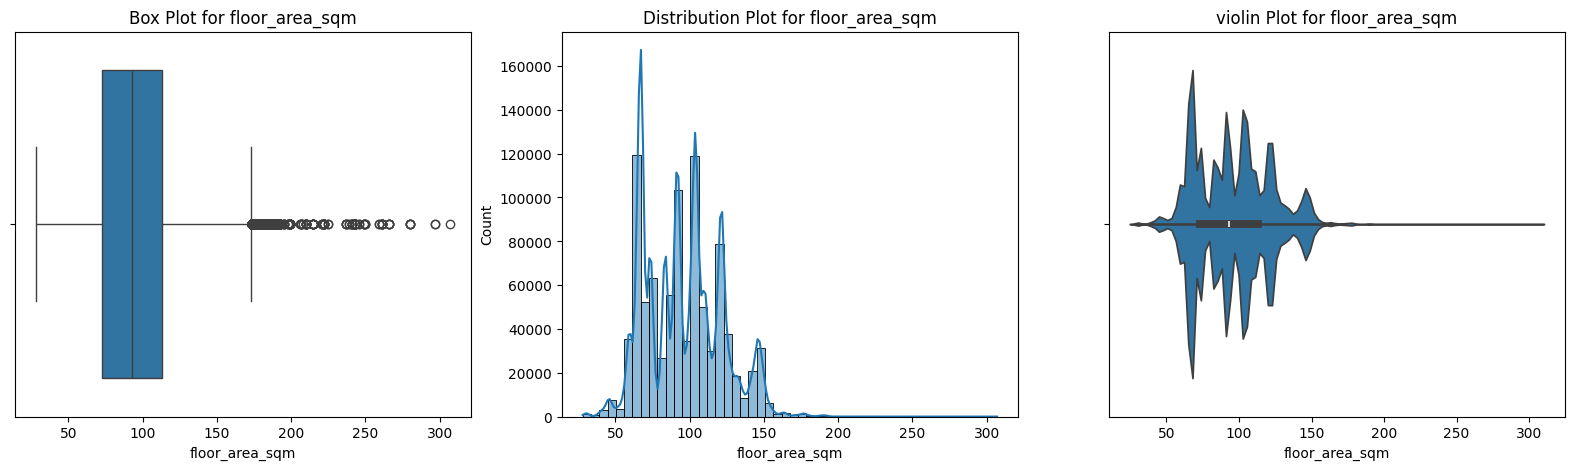

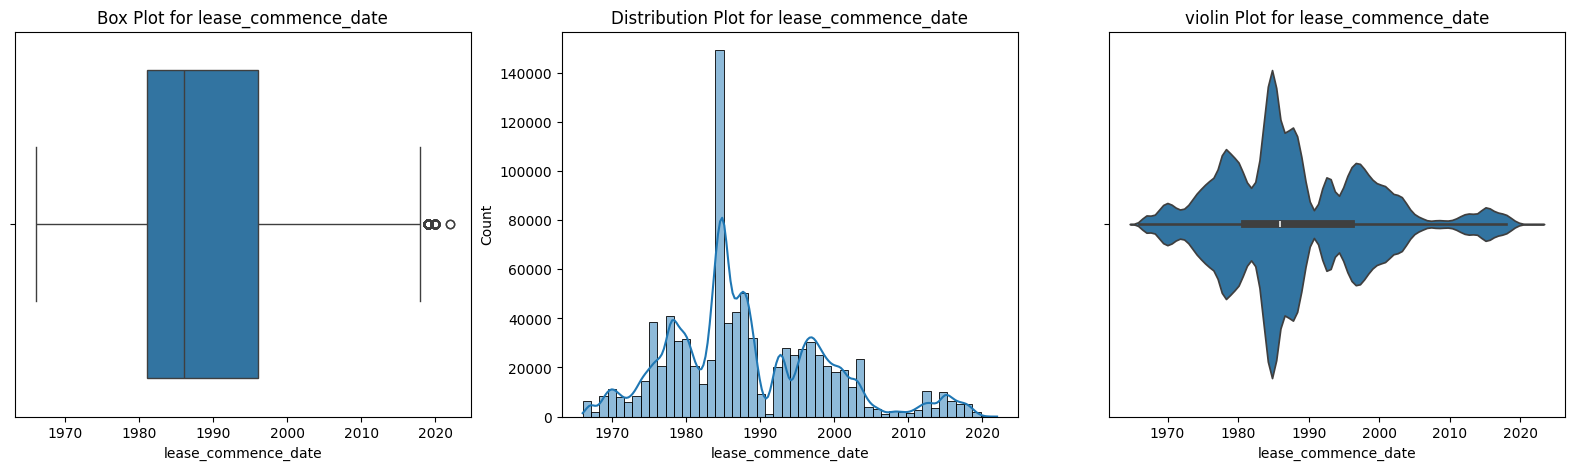

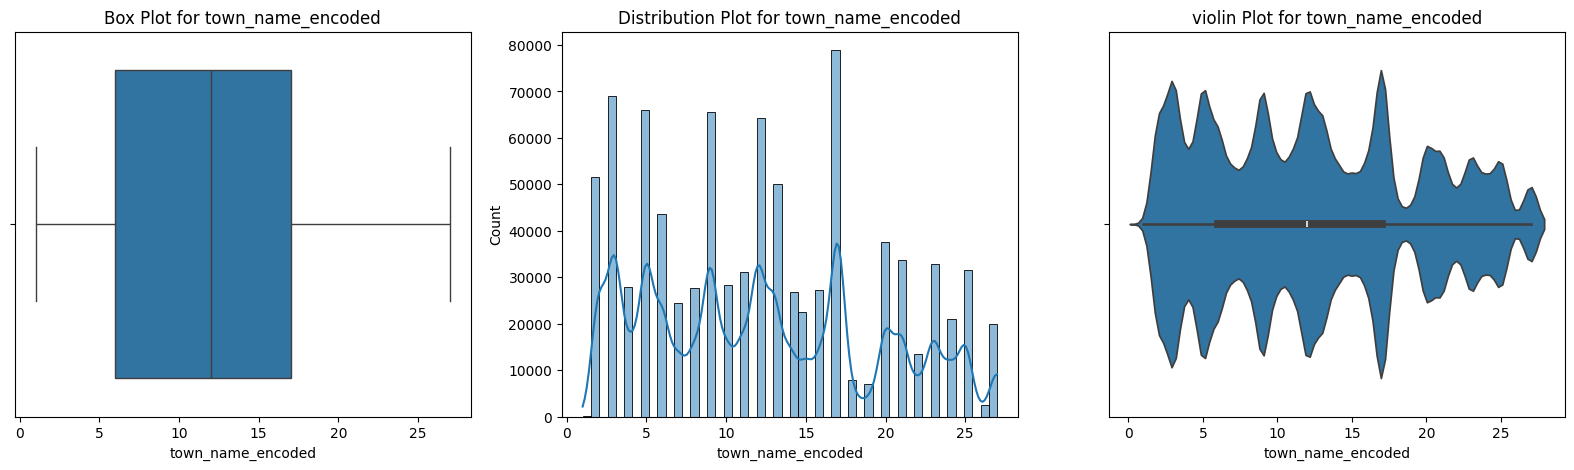

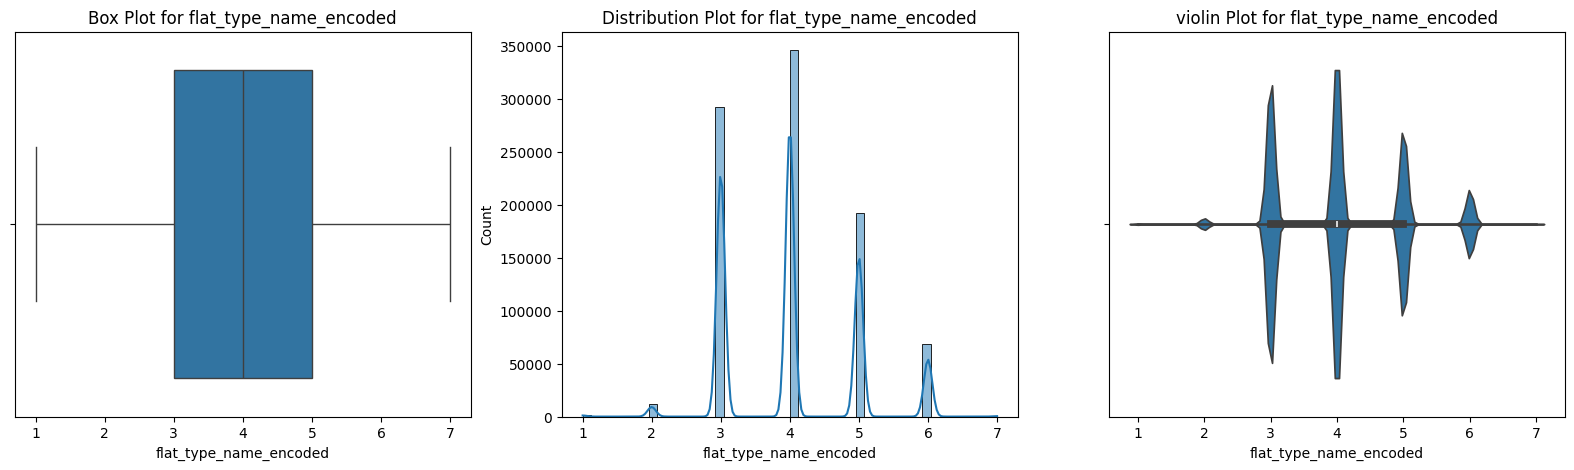

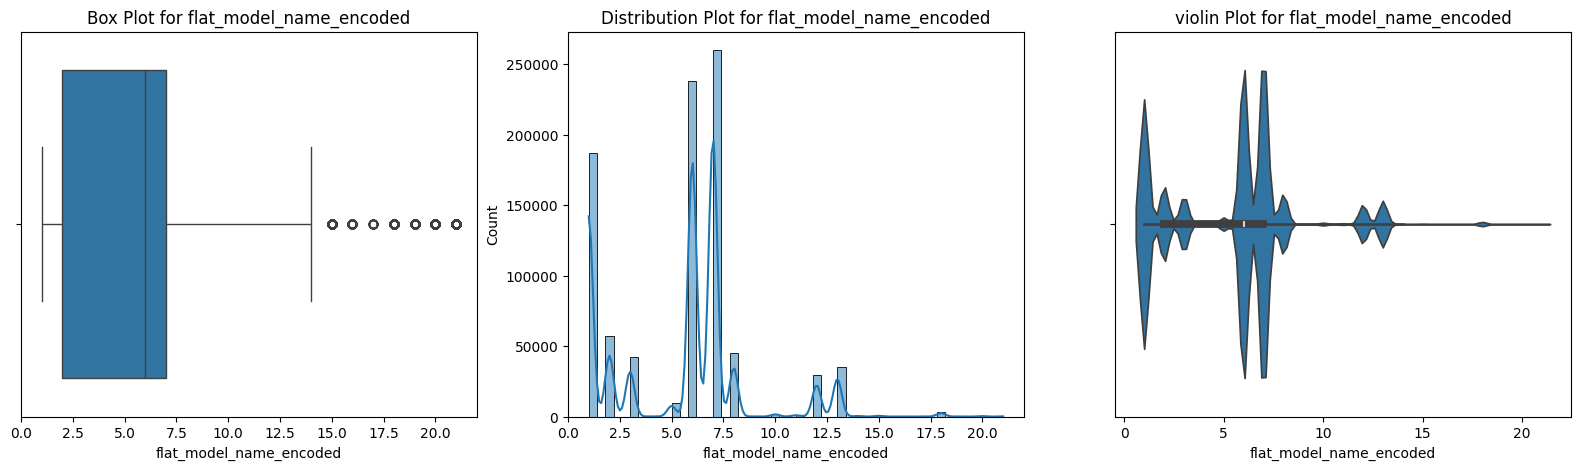

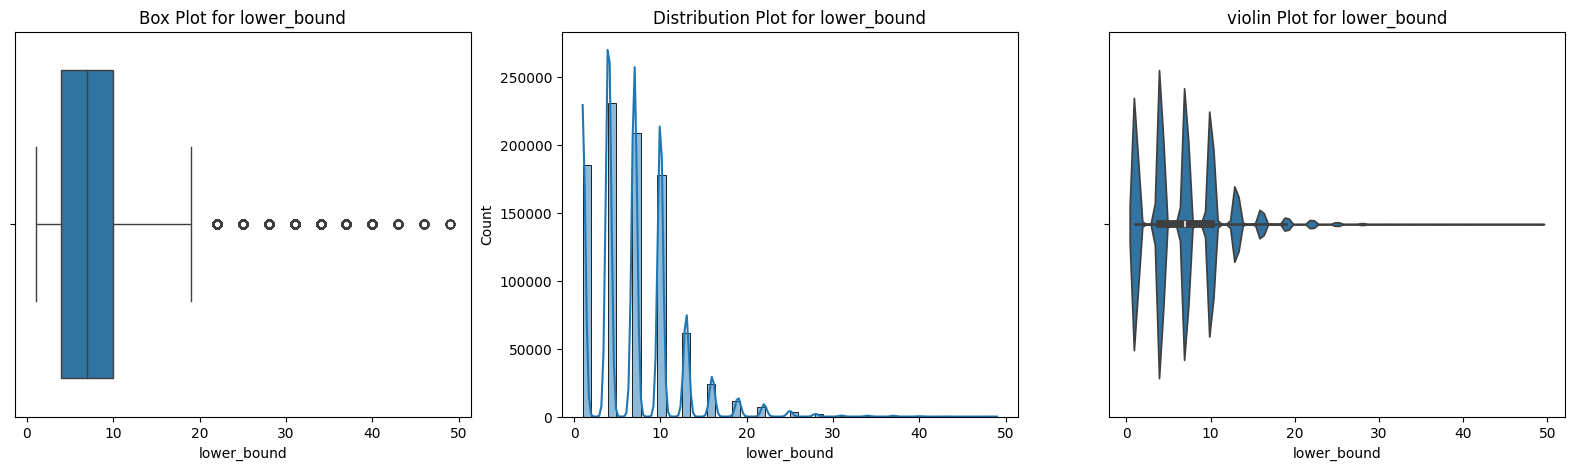

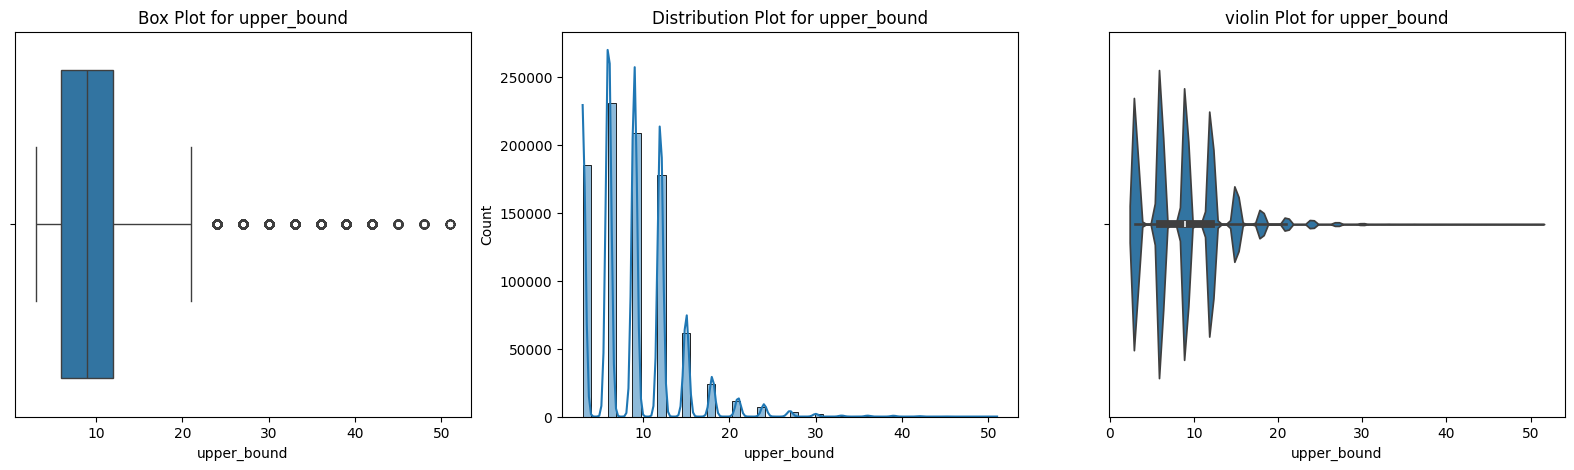

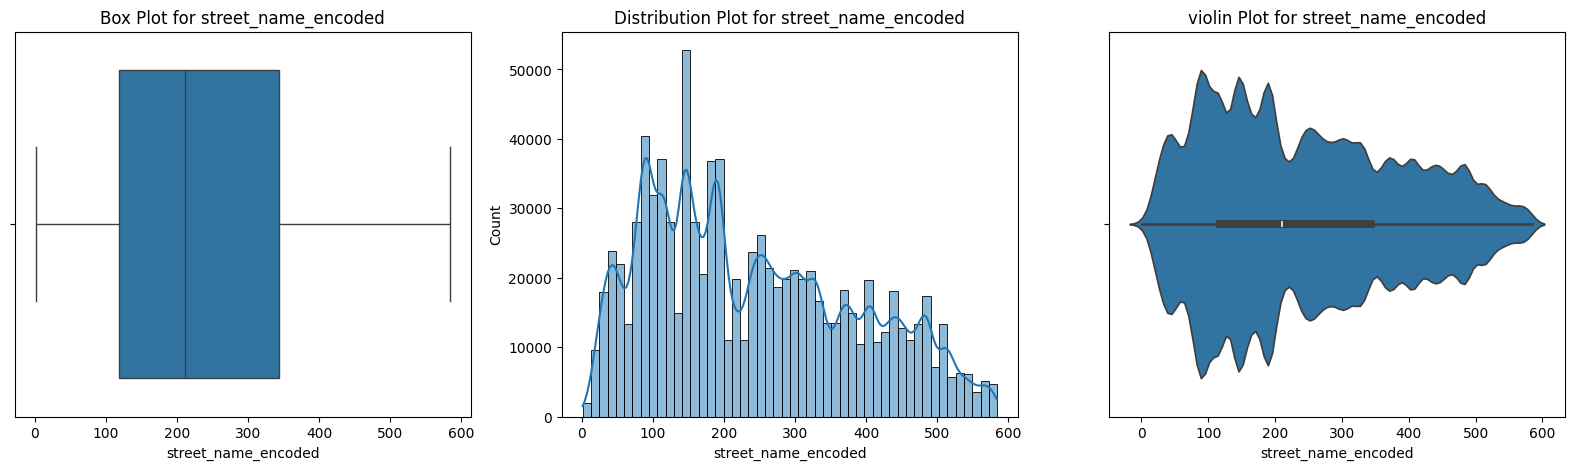

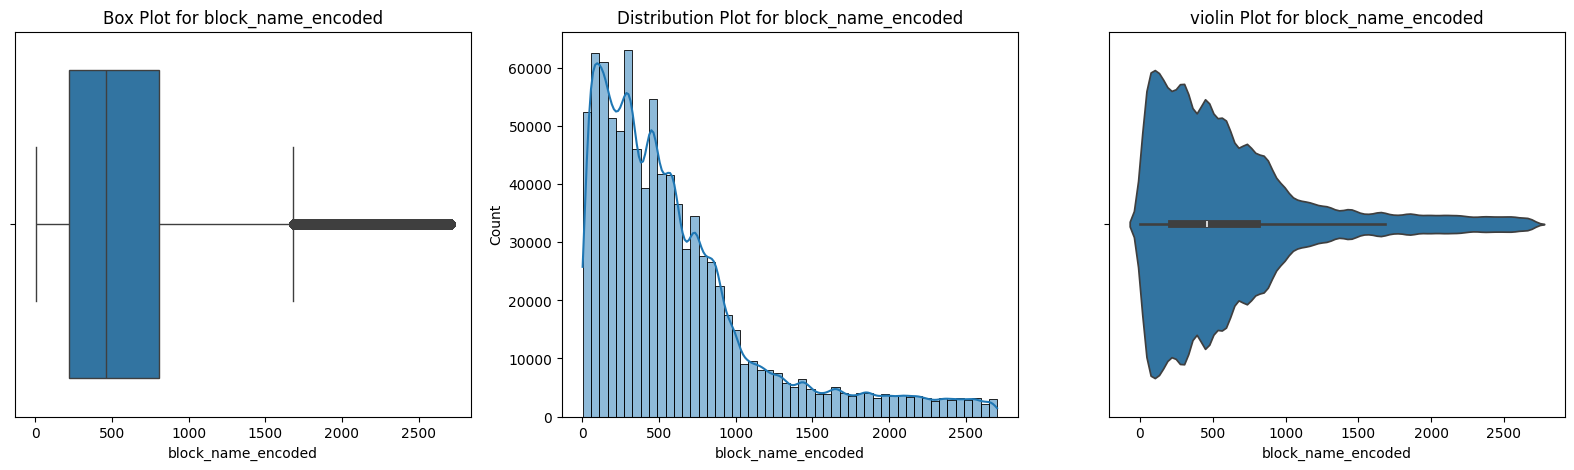

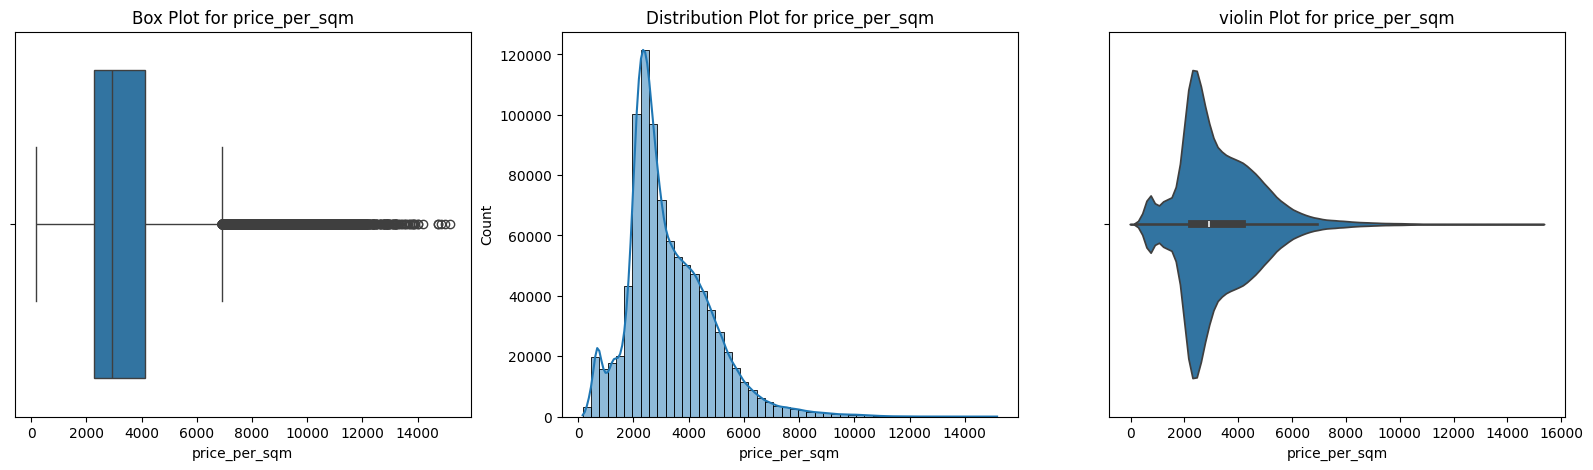

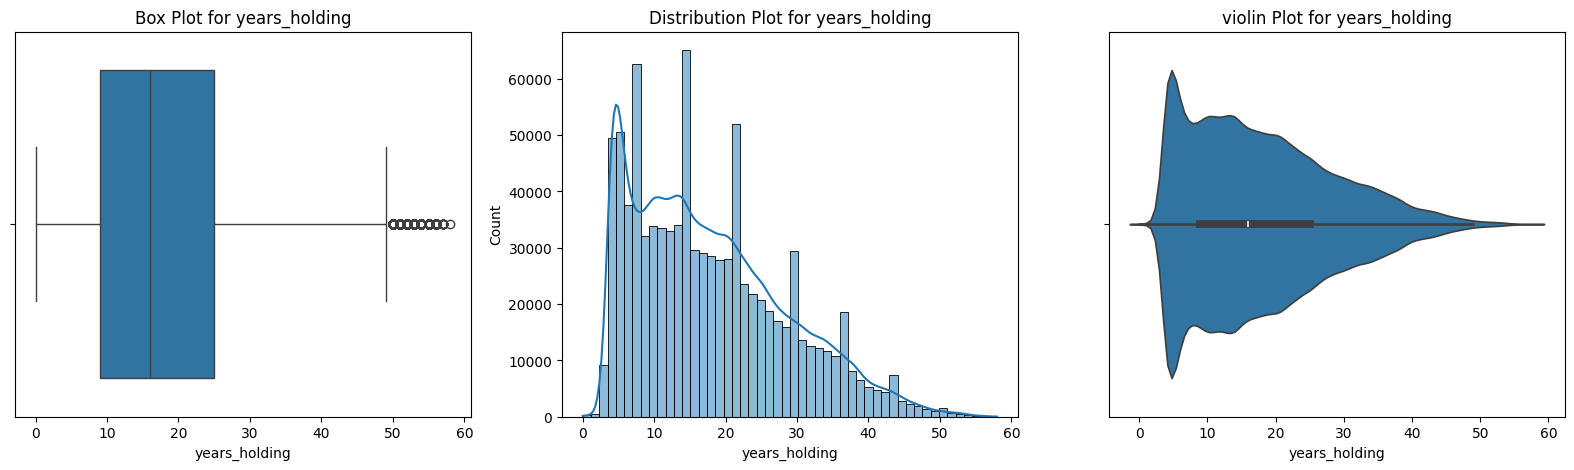

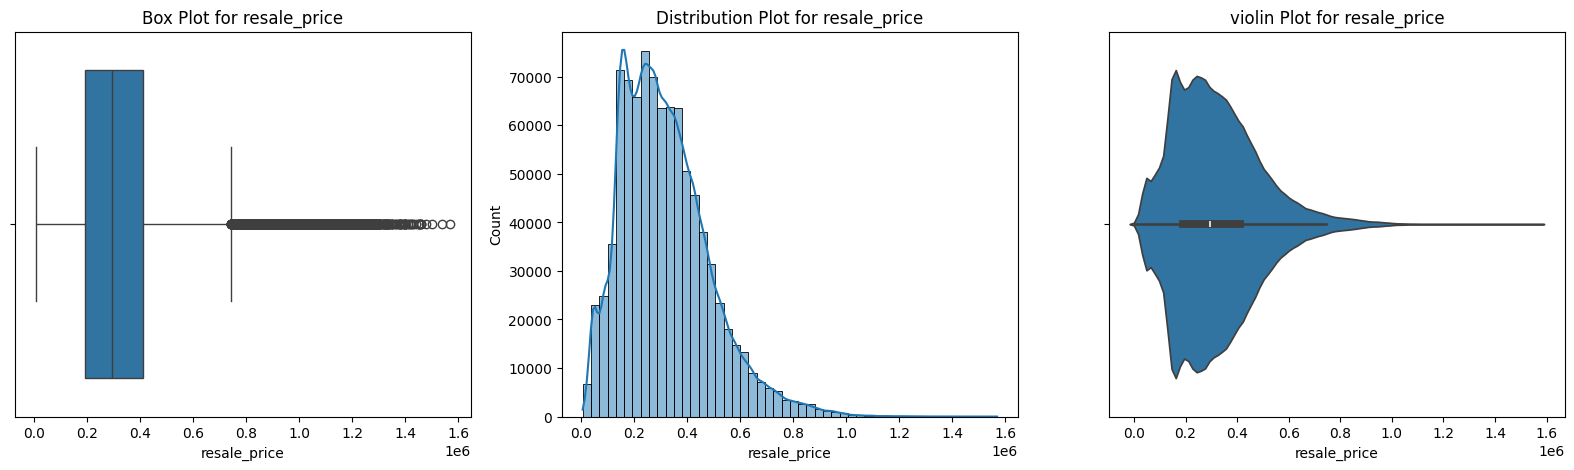

In [77]:
for i in [ 'floor_area_sqm', 'lease_commence_date','town_name_encoded', 'flat_type_name_encoded',
       'flat_model_name_encoded', 'lower_bound', 'upper_bound','street_name_encoded','block_name_encoded',
       'price_per_sqm', 'years_holding','resale_price']:
     plot(k, i)

In [78]:
k.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'year', 'current_remaining_lease', 'street_name_encoded',
       'town_name_encoded', 'flat_type_name_encoded',
       'flat_model_name_encoded', 'block_name_encoded', 'lower_bound',
       'upper_bound', 'price_per_sqm', 'years_holding'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

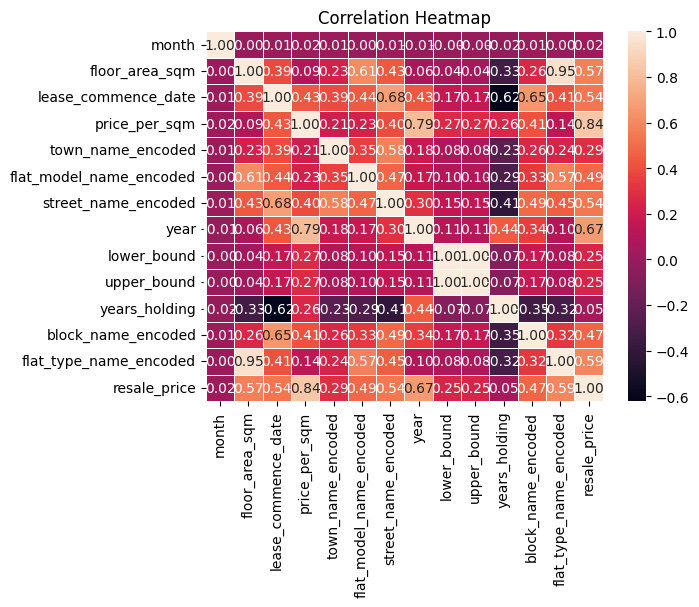

In [79]:
col = ['month', 'floor_area_sqm', 'lease_commence_date','price_per_sqm','town_name_encoded','flat_model_name_encoded',
       'street_name_encoded', 'year', 'lower_bound', 'upper_bound','years_holding','block_name_encoded','flat_type_name_encoded','resale_price']
      
df_heatmap = k[col].corr()
sns.heatmap(df_heatmap, annot=True,fmt=".2f",linewidths=0.5) # annot=True means Displaying the correlation values in each cell.
plt.title('Correlation Heatmap')

MODEL TRAINING AND TESTING

In [81]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import pickle

In [82]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(k, algorithm):
    X = k.drop(columns=['resale_price', 'block', 'flat_type', 'flat_model', 'town', 'street_name'], axis=1)
    y = k['resale_price']  

# Initialize the scaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform it
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = algorithm().fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [83]:

print(machine_learning_regression(k, LinearRegression))
print(machine_learning_regression(k, KNeighborsRegressor))
print(machine_learning_regression(k, DecisionTreeRegressor))
print(machine_learning_regression(k, ExtraTreesRegressor))
print(machine_learning_regression(k, RandomForestRegressor))
print(machine_learning_regression(k, AdaBoostRegressor))
print(machine_learning_regression(k, GradientBoostingRegressor))
print(machine_learning_regression(k, XGBRegressor))
     

{'algorithm': 'LinearRegression', 'R2_train': 0.9581872461936032, 'R2_test': 0.9580512441326168}
{'algorithm': 'KNeighborsRegressor', 'R2_train': 0.989041028181161, 'R2_test': 0.983045699999263}
{'algorithm': 'DecisionTreeRegressor', 'R2_train': 1.0, 'R2_test': 0.9998756905940489}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999999999885772, 'R2_test': 0.9999095115883448}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9999950453620714, 'R2_test': 0.9999442064079515}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.901566985294991, 'R2_test': 0.9017577326534932}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.9974121357576351, 'R2_test': 0.9973482853791629}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9994973769158614, 'R2_test': 0.9993721841969538}


In [84]:
x = k.drop(columns=['resale_price', 'block', 'flat_type', 'flat_model', 'town', 'street_name'], axis=1)
y = k['resale_price']  

# Initialize the scaler
scaler = StandardScaler()

    # Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_modeled = LinearRegression().fit(x_train, y_train)
y_pred_train = best_modeled.predict(x_train)
y_pred_test = best_modeled.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9581872461936032, 0.9580512441326168)

In [85]:
x = k.drop(columns=['resale_price', 'block', 'flat_type', 'flat_model', 'town', 'street_name'], axis=1)
y = k['resale_price']  

# Initialize the scaler
scaler = StandardScaler()

    # Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_modeled = LinearRegression().fit(x_train, y_train)
y_pred = best_modeled.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9580512441326168,
 'Mean Absolute Error': 23239.670314422954,
 'Mean Squared Error': 1191512186.6141093,
 'Root Mean Squared Error': 34518.28771266196}

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming `k` is your DataFrame
x = k.drop(columns=['resale_price', 'block', 'flat_type', 'flat_model', 'town', 'street_name'], axis=1)
y = k['resale_price']

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regression__fit_intercept': [True, False],
    'regression__copy_X': [True, False],
    'regression__n_jobs': [None, 1, -1],
    # You can add more hyperparameters to tune here
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(x, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'regression__copy_X': True, 'regression__fit_intercept': True, 'regression__n_jobs': None}
Best score: -1663462669.6508572


In [95]:
x = k.drop(columns=['resale_price', 'block', 'flat_type', 'flat_model', 'town', 'street_name'], axis=1)
y = k['resale_price']  

# Initialize the scaler
scaler = StandardScaler()

    # Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_modeled = LinearRegression(copy_X=True, fit_intercept=True,  n_jobs=None).fit(x_train, y_train)
y_pred = best_modeled.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9580512441326168,
 'Mean Absolute Error': 23239.670314422954,
 'Mean Squared Error': 1191512186.6141093,
 'Root Mean Squared Error': 34518.28771266196}

In [97]:
import pickle

# Assuming 'regression_model' is the trained model you want to save

# Open a file for writing in binary mode
with open('linearreg.pkl', 'wb') as lr:
    # Use pickle.dump() to save the model
    pickle.dump(best_modeled, lr)


In [98]:
# load the pickle model to predict selling price

with open('/Users/karthickkumar/Desktop/singapore resale flat/linearreg.pkl', 'rb') as lr:
   best_modeled  = pickle.load(lr)

In [99]:
k.head(1)

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,...,current_remaining_lease,street_name_encoded,town_name_encoded,flat_type_name_encoded,flat_model_name_encoded,block_name_encoded,lower_bound,upper_bound,price_per_sqm,years_holding
0,1,ANG MO KIO,1 room,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,...,52.0,115,2,1,6,39,10,12,290.322581,13


In [101]:
user_data = np.array([[1,309,31.0,1977,86.0,52.0,115,2,1,6,39,10,12,290.322581,13]])
y_pred = best_modeled.predict(user_data)
y_pred[0]

4.290727278650348e+19

In [103]:
# Assuming user_data is your input data
user_data = np.array([[1,309,31.0,1977,86.0,52.0,115,2,1,6,39,10,12,290.322581,13]])

# Extract the scaler object from the pipeline
scaler = grid_search.best_estimator_['scaler']

# Scale the user data
scaled_user_data = scaler.transform(user_data)

# Now, you can use the scaled data for prediction
y_pred = grid_search.best_estimator_.predict(scaled_user_data)

# Print the predicted value
print("Predicted resale price:", y_pred[0])


Predicted resale price: 5.079663934237396e+19


/Users/karthickkumar/Desktop/singapore resale flat/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/karthickkumar/Desktop/singapore resale flat/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [106]:
y_pred = best_modeled.predict([x_test[0]])

# Accessing the predicted value
predicted_value = y_pred[0]

In [107]:
predicted_value

368648.1254563258